In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Exploratory Data Analysis

We have three types of Data:

  Training and Test folders of Car damaged, not damaged images.
  Training and Test folders of Damage on Front, Rear, Side.
  Training and Test folders of Damage severity Minor, Moderate, Severe.

"""

'\nExploratory Data Analysis\n\nWe have three types of Data:\n\n  Training and Test folders of Car damaged, not damaged images.\n  Training and Test folders of Damage on Front, Rear, Side.\n  Training and Test folders of Damage severity Minor, Moderate, Severe.\n\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
from tqdm import tqdm
import cv2
import random

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
"""
Stage 1 (Damaged or Not Damaged):
In EDA we will look at how many files each folder has and the top image height 
and width in our data.
"""

'\nStage 1 (Damaged or Not Damaged):\nIn EDA we will look at how many files each folder has and the top image height \nand width in our data.\n'

In [ ]:
#Date 1
train_damaged_list = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage')
train_whole_list = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/01-whole')
validate_damaged_list = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/00-damage')
validate_whole_list = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/01-whole')

In [ ]:
#Function to analyze the data present in different folder
def plot_bar(classes, counts, name):
  plt.figure(figsize=(5,5))
  f = sns.barplot(x=classes, y=counts)
  plt.xlabel("Class Labels", fontsize=12)
  plt.ylabel("Count", fontsize=12)
  plt.title("Number of images in " +name+ " folder", fontsize=12)
  plt.show()

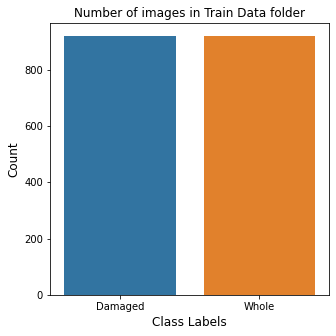

Number of Damaged images in train folder is 920
Number of Whole images in train folder is 920


In [ ]:
#Plotting training dataset of data1a
classes = ["Damaged", "Whole"]
counts = [len(train_damaged_list), len(train_whole_list)]
plot_bar(classes, counts, "Train Data")
for i in range(len(classes)):
  print("Number of " +classes[i]+ " images in train folder is " +str(counts[i]))

In [ ]:
"""
Observation:
1- Number of images in damaged and whole dataset is same (920)
2- No class imbalance
3- To increase the dataset we will use data augumentation
"""

'\nObservation:\n1- Number of images in damaged and whole dataset is same (920)\n2- No class imbalance\n3- To increase the dataset we will use data augumentation\n'

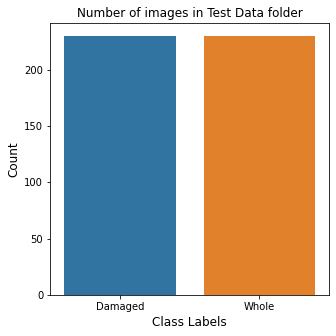

Number of Damaged images in test folder are 230
Number of Whole images in test folder are 230


In [ ]:
#Plotting testing dataset of data1a
classes = ["Damaged", "Whole"]
counts = [len(validate_damaged_list), len(validate_whole_list)]
plot_bar(classes, counts, "Test Data")
for i in range(len(classes)):
  print("Number of " +classes[i]+ " images in test folder are " +str(counts[i]))

In [ ]:
"""
Observation:
1- Number of images in damaged and whole dataset is same (230)
2- No class imbalance
3- To increase the dataset we will use data augumentation
"""

'\nObservation:\n1- Number of images in damaged and whole dataset is same (230)\n2- No class imbalance\n3- To increase the dataset we will use data augumentation\n'

In [ ]:
def img_shapes(files, path):
  shapes = []
  for i in files:
    img = cv2.imread(path+'/'+i)
    shapes.append(img.shape)
  return shapes

In [ ]:
#Training damaged image data
train_dmg = img_shapes(train_damaged_list, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage')
#Training whole image data
train_whole_dmg = img_shapes(train_whole_list, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/01-whole')
train_df = pd.DataFrame(list(zip(train_dmg, train_whole_dmg)),columns = classes)

No. of unique image shapes in train damaged folder are  132
No. of unique image shapes in train whole folder are  385


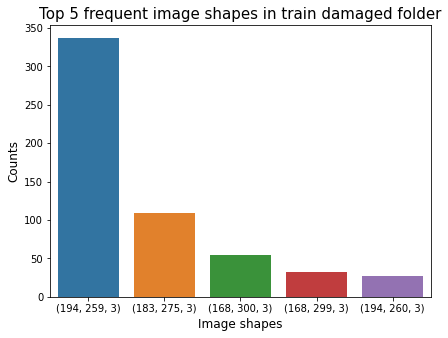

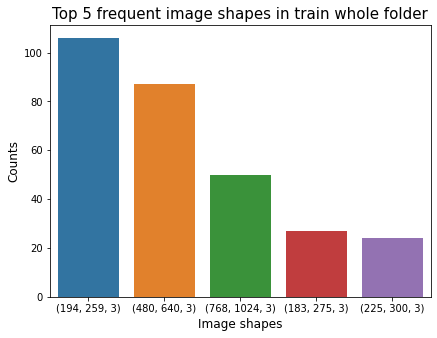

In [ ]:
#Analysis of shapes for Damaged data
num = [str(i) for i in train_df['Damaged'].value_counts().index[:5]]
counts_val = [i for i in train_df['Damaged'].value_counts()[:5]]
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x = num, y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train damaged folder", fontsize=15)

#Analysis of shapes for Non-Damaged data
num = [str(i) for i in train_df['Whole'].value_counts().index[:5]]
counts_val = [i for i in train_df['Whole'].value_counts()[:5]]
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.barplot(x = num, y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 frequent image shapes in train whole folder", fontsize=15)

print("No. of unique image shapes in train damaged folder are ", len(train_df["Damaged"].unique()))
print("No. of unique image shapes in train whole folder are ", len(train_df["Whole"].unique()))

In [ ]:
"""
Observations:
1- image shape of (194, 259) are more in both the folders.
2- 132 unique shapes presnt in train damaged folder.
3- 385 unique image shapes present in train not damaged folder.
"""

'\nObservations:\n1- image shape of (194, 259) are more in both the folders.\n2- 132 unique shapes presnt in train damaged folder.\n3- 385 unique image shapes present in train not damaged folder.\n'

In [ ]:
#Data 2:
train_front = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front')
train_rear = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/01-rear')
train_side = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/02-side')

In [ ]:
validate_front = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/00-front')
validate_rear = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/01-rear')
validate_side = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/02-side')

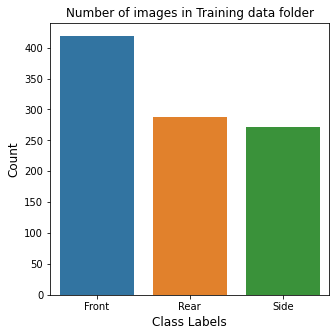

Number of Front images in train folder are 419
Number of Rear images in train folder are 288
Number of Side images in train folder are 272


In [ ]:
classes = ['Front','Rear','Side']
counts = [len(train_front),len(train_rear),len(train_side)]
plot_bar(classes,counts,'Training data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train folder are '+str(counts[i]))

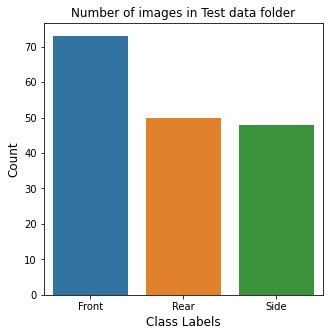

Number of Front images in test folder are 73
Number of Rear images in test folder are 50
Number of Side images in test folder are 48


In [ ]:
classes = ['Front','Rear','Side']
counts = [len(validate_front),len(validate_rear),len(validate_side)]
plot_bar(classes,counts,'Test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test folder are '+str(counts[i]))

In [ ]:
"""
Observation:
1- Images in front, rear and side train and test folders are not equal. We have more images in the front folder.
2- We can increase the dataset using data augumentation
"""

'\nObservation:\n1- Images in front, rear and side train and test folders are not equal. We have more images in the front folder.\n2- We can increase the dataset using data augumentation\n'

In [ ]:
#Training front image data
train_front_shape = img_shapes(train_front, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front')
#Training rear image data
train_rear_shape = img_shapes(train_rear, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/01-rear')
#Training side image data
train_side_shape = img_shapes(train_side, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/02-side')
train_df = pd.DataFrame(list(zip(train_front_shape, train_rear_shape, train_side_shape)),columns = classes)

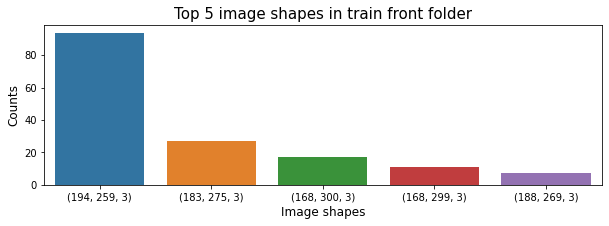

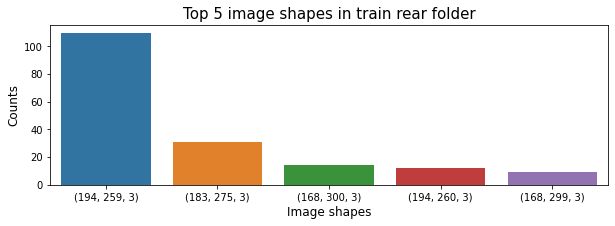

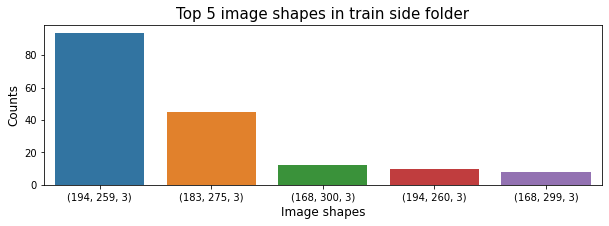

No. of unique image shapes in train front folder are  74
No. of unique image shapes in train rear folder are  64
No. of unique image shapes in train side folder are  60


In [ ]:
#Front train
num = [str(i) for i in train_df['Front'].value_counts().index[:5]]
counts_val = [i for i in train_df['Front'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(x = num,y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 image shapes in train front folder", fontsize=15)

#Rear train
num = [str(i) for i in train_df['Rear'].value_counts().index[:5]]
counts_val = [i for i in train_df['Rear'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.barplot(x = num,y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 image shapes in train rear folder", fontsize=15)
plt.show()

#Side train
num = [str(i) for i in train_df['Side'].value_counts().index[:5]]
counts_val = [i for i in train_df['Side'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.barplot(x = num,y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 image shapes in train side folder", fontsize=15)
plt.show()

print("No. of unique image shapes in train front folder are ", len(train_df["Front"].unique()))
print("No. of unique image shapes in train rear folder are ", len(train_df["Rear"].unique()))
print("No. of unique image shapes in train side folder are ", len(train_df["Side"].unique()))

In [ ]:
"""
Observation:
1- Image shape (194, 259) is more in all the folders.
2- 74 unique shapes present in train front folder
3- 64 unique shapes present in train rear folder
4- 60 unique shapes present in train side folder
"""

'\nObservation:\n1- Image shape (194, 259) is more in all the folders.\n2- 74 unique shapes present in train front folder\n3- 64 unique shapes present in train rear folder\n4- 60 unique shapes present in train side folder\n'

In [ ]:
#Data 3
train_minor = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/01-minor')
train_moderate = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/02-moderate')
train_severe = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe')

In [ ]:
validate_minor = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/01-minor')
validate_moderate = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/02-moderate')
validate_severe = os.listdir('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/03-severe')

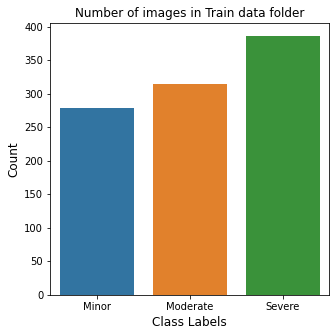

Number of Minor images in train folder are 278
Number of Moderate images in train folder are 315
Number of Severe images in train folder are 386


In [ ]:
classes = ['Minor','Moderate','Severe']
counts = [len(train_minor),len(train_moderate),len(train_severe)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in train folder are '+str(counts[i]))

In [ ]:
"""
Observation:
1- Minor images in train folder: 278
2- Moderate images in train folder: 315
3- Severe Images in train folder: 386
"""

'\nObservation:\n1- Minor images in train folder: 278\n2- Moderate images in train folder: 315\n3- Severe Images in train folder: 386\n'

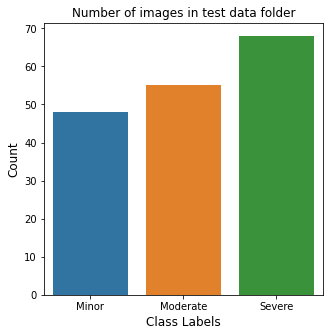

Number of Minor images in test folder are 48
Number of Moderate images in test folder are 55
Number of Severe images in test folder are 68


In [ ]:
classes = ['Minor','Moderate','Severe']
counts = [len(validate_minor),len(validate_moderate),len(validate_severe)]
plot_bar(classes,counts,'test data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in test folder are '+str(counts[i]))

In [ ]:
"""
Obsservation:
1- Minor images in validate folder: 48
2- Moderate images in validate  folder: 55
3- Severe images in validate folder: 68
"""

'\nObsservation:\n1- Minor images in validate folder: 48\n2- Moderate images in validate  folder: 55\n3- Severe images in validate folder: 68\n'

In [ ]:
#Training minor image data
train_minor_shape = img_shapes(train_minor, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/01-minor')
#Training moderate image data
train_moderate_shape = img_shapes(train_moderate, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/02-moderate')
#Training severe image data
train_severe_shape = img_shapes(train_severe, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe')
train_df = pd.DataFrame(list(zip(train_minor_shape, train_moderate_shape, train_severe_shape)),columns = classes)

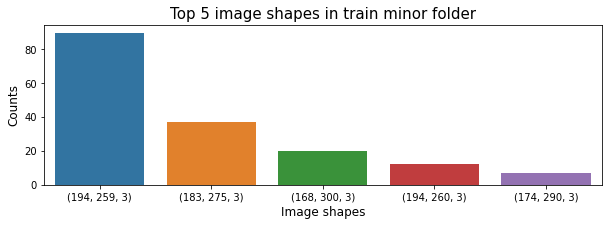

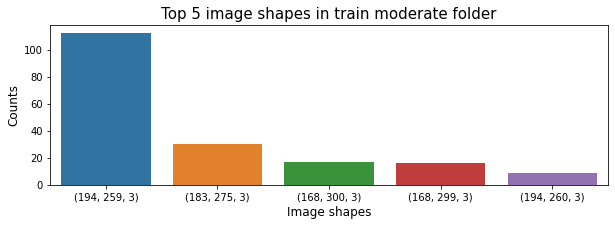

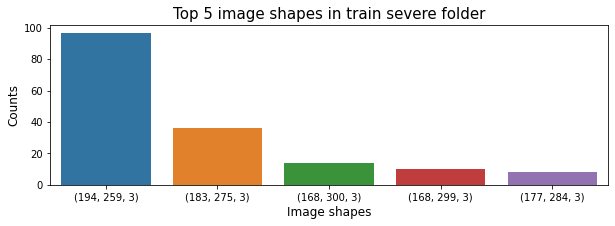

No. of unique image shapes in train minor folder are  66
No. of unique image shapes in train moderate folder are  61
No. of unique image shapes in train severe folder are  71


In [ ]:
#Minor train
num = [str(i) for i in train_df['Minor'].value_counts().index[:5]]
counts_val = [i for i in train_df['Minor'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.barplot(x = num,y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 image shapes in train minor folder", fontsize=15)

#Moderate train
num = [str(i) for i in train_df['Moderate'].value_counts().index[:5]]
counts_val = [i for i in train_df['Moderate'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.barplot(x = num,y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 image shapes in train moderate folder", fontsize=15)
plt.show()

#Side train
num = [str(i) for i in train_df['Severe'].value_counts().index[:5]]
counts_val = [i for i in train_df['Severe'].value_counts()[:5]]
plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.barplot(x = num,y = counts_val)
plt.xlabel("Image shapes", fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Top 5 image shapes in train severe folder", fontsize=15)
plt.show()

print("No. of unique image shapes in train minor folder are ", len(train_df["Minor"].unique()))
print("No. of unique image shapes in train moderate folder are ", len(train_df["Moderate"].unique()))
print("No. of unique image shapes in train severe folder are ", len(train_df["Severe"].unique()))

In [ ]:
"""
Obseravtion:
1- (194, 259.3) is most in all classes
2- 66 unique image sizes present in train minor folder.
3- 61 unique image sizes present in train moderate folder.
4- 71 unique image sizes present in train severe folder.
"""

'\nObseravtion:\n1- (194, 259.3) is most in all classes\n2- 66 unique image sizes present in train minor folder.\n3- 61 unique image sizes present in train moderate folder.\n4- 71 unique image sizes present in train severe folder.\n'

In [ ]:
#Data without augmentation
lists = [["damaged", "not_damaged"], ["front", "rear", "side"], ["minor", "moderate", "severe"]]
data = ["data_1", "data_2", "data_3"]

In [ ]:
def create_folders(name,class_lists,data):
    os.mkdir(name)
    for i in range(3):
        os.mkdir(name+'/'+data[i])
        for j in ['train','test']:
            temp_paths = []
            os.mkdir(name+'/'+data[i]+'/'+j)
            for k in class_lists[i]:
                os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
                temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
            paths.append(temp_paths)

In [ ]:
paths = []
create_folders('data',lists, data)

In [ ]:
#Saving images
def save_images(name,save_path,image_path):
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)

In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

data/data_1/train/damaged
data/data_1/train/not_damaged
data/data_1/test/damaged
data/data_1/test/not_damaged


In [ ]:
for i in tqdm(train_damaged_list):
  save_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage')

100%|██████████| 920/920 [00:05<00:00, 170.90it/s]


In [ ]:
for i in tqdm(train_whole_list):
    save_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/01-whole')

100%|██████████| 920/920 [00:23<00:00, 38.91it/s]


In [ ]:
for i in tqdm(validate_damaged_list):
    save_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/00-damage')

100%|██████████| 230/230 [00:40<00:00,  5.69it/s]


In [ ]:
for i in tqdm(validate_whole_list):
    save_images(i, test_save_path_2, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/01-whole')

100%|██████████| 230/230 [00:59<00:00,  3.89it/s]


In [ ]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data/data_2/train/front
data/data_2/train/rear
data/data_2/train/side
data/data_2/test/front
data/data_2/test/rear
data/data_2/test/side


In [ ]:
for i in tqdm(train_front):
    save_images(i,train_save_path_1, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front')

100%|██████████| 419/419 [00:02<00:00, 172.39it/s]


In [ ]:
for i in tqdm(train_rear):
    save_images(i,train_save_path_2, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/01-rear')

100%|██████████| 288/288 [00:01<00:00, 172.80it/s]


In [ ]:
for i in tqdm(train_side):
    save_images(i,train_save_path_3, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/02-side')

100%|██████████| 272/272 [00:01<00:00, 173.37it/s]


In [ ]:
for i in tqdm(validate_front):
    save_images(i,test_save_path_1, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/00-front')

100%|██████████| 73/73 [00:45<00:00,  1.61it/s]


In [ ]:
for i in tqdm(validate_rear):
    save_images(i,test_save_path_2, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/01-rear')

100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


In [ ]:
for i in tqdm(validate_side):
    save_images(i,test_save_path_3, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/02-side')

100%|██████████| 48/48 [00:25<00:00,  1.87it/s]


In [ ]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

data/data_3/train/minor
data/data_3/train/moderate
data/data_3/train/severe
data/data_3/test/minor
data/data_3/test/moderate
data/data_3/test/severe


In [ ]:
for i in tqdm(train_minor):
    save_images(i,train_save_path_1, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/01-minor')

100%|██████████| 278/278 [00:01<00:00, 172.54it/s]


In [ ]:
for i in tqdm(train_moderate):
    save_images(i,train_save_path_2, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/02-moderate')

100%|██████████| 315/315 [00:01<00:00, 171.63it/s]


In [ ]:
for i in tqdm(train_severe):
    save_images(i,train_save_path_3, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe')

100%|██████████| 386/386 [00:02<00:00, 176.37it/s]


In [ ]:
for i in tqdm(validate_minor):
    save_images(i,test_save_path_1, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/01-minor')

100%|██████████| 48/48 [00:08<00:00,  5.74it/s]


In [ ]:
for i in tqdm(validate_moderate):
    save_images(i,test_save_path_2, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:12<00:00,  4.40it/s]


In [ ]:
for i in tqdm(validate_severe):
    save_images(i,test_save_path_3, 'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/03-severe')

100%|██████████| 68/68 [00:13<00:00,  5.16it/s]


In [ ]:
#%cp -av "/content/data" "drive/MyDrive/DS_Project/Final_Dataset"

In [ ]:
#Data Augumentation
#1- Increasing the dataset by 2 times using random rotation between -20 and 20 degrees 
# and horizontal flip transformation.
#2- Increasing the dataset by 2 times using random rotation between -20 and 20, 
# shear-range of 0.2, zoom-range of 0.2 and horizontal flip.

In [ ]:
#Implementing 1st method of data augumentation as a test
paths = []
create_folders("augumentation_data_1", lists, data)

In [ ]:
#Visualization
sample_file = random.choice(train_damaged_list)
rotation = random.randint(-20,20)

In [ ]:
augumentation = ImageDataGenerator(rotation_range=rotation, horizontal_flip = True)

In [ ]:
sample_img = image.load_img('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage' + "/" + sample_file)

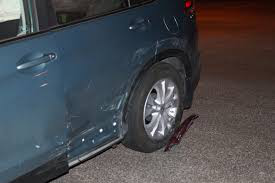

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augumentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False)
    samples.append(img_save)

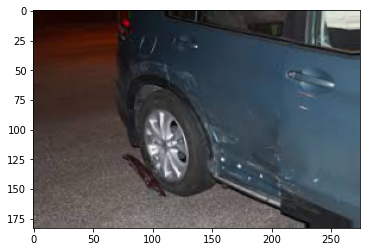

In [ ]:
plt.imshow(samples[0])

In [ ]:
#Generate image and save in folder

In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

augumentation_data_1/data_1/train/damaged
augumentation_data_1/data_1/train/not_damaged
augumentation_data_1/data_1/test/damaged
augumentation_data_1/data_1/test/not_damaged


In [ ]:
#Making a function to create augumented images
def create_images(name,save_path,image_path):
    #Generating a random number for rotation
    rotation = random.randint(-20,20)
    #Creating Image Data Generator:
    augmentation = ImageDataGenerator(rotation_range=rotation,horizontal_flip=True)
    
    #Reading the image from given path.
    image_org = image.load_img(image_path+'/'+name)
    
    #Saving original image to folder.
    image_org.save(save_path+'/'+name)
    
    #Getting the numpy array of image.
    image_arr = image.img_to_array(image_org)
    
    #Expanding dimensions of image array
    image_arr = image_arr.reshape((1,) + image_arr.shape)
    
    #Using Flow to generate 2 new images for single image
    for arr,val in zip(augmentation.flow(image_arr, batch_size=1, save_format='jpeg'),range(1)):
        name = name.split('.')[0]
        img_save = image.array_to_img(arr[0], scale=False)
        img_save.save(save_path+'/'+name+'_aug_'+str(val)+'.jpeg')
    return paths

In [ ]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage')

100%|██████████| 920/920 [00:25<00:00, 35.78it/s]


In [ ]:
for i in tqdm(train_whole_list):
    create_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/01-whole')

100%|██████████| 920/920 [02:58<00:00,  5.17it/s]


In [ ]:
for i in tqdm(validate_damaged_list):
    create_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/00-damage')

100%|██████████| 230/230 [00:07<00:00, 31.28it/s]


In [ ]:
for i in tqdm(validate_whole_list):
    create_images(i,test_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/01-whole')

100%|██████████| 230/230 [00:43<00:00,  5.27it/s]


In [ ]:
#Data 2 Visualization
sample_file = random.choice(train_front)
sample_img = image.load_img('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front' + '/' + sample_file)

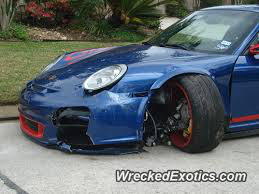

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augumentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

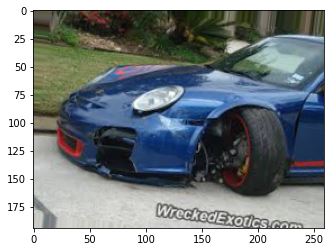

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

augumentation_data_1/data_2/train/front
augumentation_data_1/data_2/train/rear
augumentation_data_1/data_2/train/side
augumentation_data_1/data_2/test/front
augumentation_data_1/data_2/test/rear
augumentation_data_1/data_2/test/side


In [ ]:
for i in tqdm(train_front):
    create_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front')

100%|██████████| 419/419 [00:12<00:00, 34.33it/s]


In [ ]:
for i in tqdm(train_rear):
    create_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/01-rear')

100%|██████████| 288/288 [00:07<00:00, 38.15it/s]


In [ ]:
for i in tqdm(train_side):
    create_images(i,train_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/02-side')

100%|██████████| 272/272 [00:07<00:00, 38.74it/s]


In [ ]:
for i in tqdm(validate_front):
    create_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/00-front')

100%|██████████| 73/73 [00:01<00:00, 37.49it/s]


In [ ]:
for i in tqdm(validate_rear):
    create_images(i,test_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/01-rear')

100%|██████████| 50/50 [00:01<00:00, 38.04it/s]


In [ ]:
for i in tqdm(validate_side):
    create_images(i,test_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/02-side')

100%|██████████| 48/48 [00:01<00:00, 37.40it/s]


In [ ]:
#Data 3 - Visualization

In [ ]:
sample_file = random.choice(train_severe)
sample_img = image.load_img('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe'+'/'+sample_file)

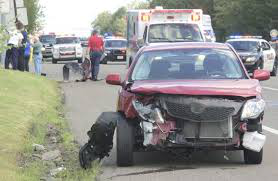

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augumentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

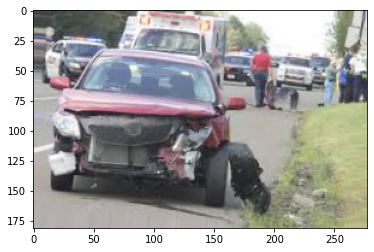

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

augumentation_data_1/data_3/train/minor
augumentation_data_1/data_3/train/moderate
augumentation_data_1/data_3/train/severe
augumentation_data_1/data_3/test/minor
augumentation_data_1/data_3/test/moderate
augumentation_data_1/data_3/test/severe


In [ ]:
for i in tqdm(train_minor):
    create_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/01-minor')

100%|██████████| 278/278 [00:07<00:00, 39.28it/s]


In [ ]:
for i in tqdm(train_moderate):
    create_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/02-moderate')

100%|██████████| 315/315 [00:08<00:00, 38.74it/s]


In [ ]:
for i in tqdm(train_severe):
    create_images(i,train_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe')

100%|██████████| 386/386 [00:11<00:00, 34.15it/s]


In [ ]:
for i in tqdm(validate_minor):
    create_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/01-minor')

100%|██████████| 48/48 [00:27<00:00,  1.77it/s]


In [ ]:
for i in tqdm(validate_moderate):
    create_images(i,test_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:31<00:00,  1.77it/s]


In [ ]:
for i in tqdm(validate_severe):
    create_images(i,test_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/03-severe')

100%|██████████| 68/68 [00:38<00:00,  1.76it/s]


In [ ]:
#%cp -av "/content/augumentation_data_1" "drive/MyDrive/DS_Project/Final_Dataset"

In [ ]:
#Final Count after augumentation

In [ ]:
data_1_files = len(os.listdir('/content/augumentation_data_1/data_1/test/damaged'))+len(os.listdir('/content/augumentation_data_1/data_1/train/damaged'))+len(os.listdir('/content/augumentation_data_1/data_1/train/not_damaged'))+len(os.listdir('/content/augumentation_data_1/data_1/test/not_damaged'))
print('Number of files for all classes in damaged and whole folders are',data_1_files)

Number of files for all classes in damaged and whole folders are 4600


In [ ]:
data_2_files = len(os.listdir('/content/augumentation_data_1/data_2/test/front'))+len(os.listdir('/content/augumentation_data_1/data_2/train/front'))+len(os.listdir('/content/augumentation_data_1/data_2/test/rear'))+len(os.listdir('/content/augumentation_data_1/data_2/train/rear'))+len(os.listdir('/content/augumentation_data_1/data_2/train/side'))+len(os.listdir('/content/augumentation_data_1/data_2/train/side'))
print('Number of files for all classes in front, side and rear folders are ',data_2_files)

Number of files for all classes in front, side and rear folders are  2748


In [ ]:
data_3_files = len(os.listdir('/content/augumentation_data_1/data_3/test/minor'))+len(os.listdir('/content/augumentation_data_1/data_3/train/minor'))+len(os.listdir('/content/augumentation_data_1/data_3/test/moderate'))+len(os.listdir('/content/augumentation_data_1/data_3/train/moderate'))+len(os.listdir('/content/augumentation_data_1/data_3/train/severe'))+len(os.listdir('/content/augumentation_data_1/data_3/train/severe'))
print('Number of files for all classes in minor, moderate and severe folders are ',data_3_files)

Number of files for all classes in minor, moderate and severe folders are  2936


In [ ]:
#Data Augumentation 2

In [ ]:
paths = []
# def create_folders(name,class_lists,data):
#     os.mkdir(name)
#     for i in range(3):
#         os.mkdir(name+'/'+data[i])
#         for j in ['train','test']:
#             temp_paths = []
#             os.mkdir(name+'/'+data[i]+'/'+j)
#             for k in class_lists[i]:
#                 os.mkdir(name+'/'+data[i]+'/'+j+'/'+k)
#                 temp_paths.append(name+'/'+data[i]+'/'+j+'/'+k)
#             paths.append(temp_paths)
create_folders('augumentation_data_2',lists,data)

In [ ]:
sample_file = random.choice(train_damaged_list)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=rotation, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

In [ ]:
sample_img = image.load_img('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage'+'/'+sample_file)

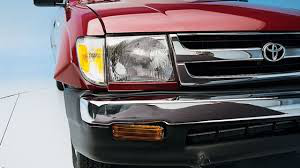

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

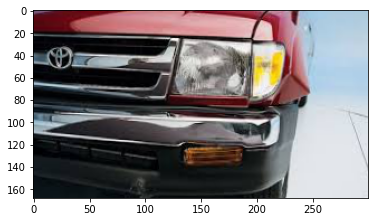

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[0][0]
train_save_path_2 = paths[0][1]
test_save_path_1 = paths[1][0]
test_save_path_2 = paths[1][1]
print(train_save_path_1)
print(train_save_path_2)
print(test_save_path_1)
print(test_save_path_2)

augumentation_data_2/data_1/train/damaged
augumentation_data_2/data_1/train/not_damaged
augumentation_data_2/data_1/test/damaged
augumentation_data_2/data_1/test/not_damaged


In [ ]:
for i in tqdm(train_damaged_list):
    create_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/00-damage')

100%|██████████| 920/920 [00:23<00:00, 39.35it/s]


In [ ]:
for i in tqdm(train_whole_list):
    create_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/training/01-whole')

 62%|██████▎   | 575/920 [02:04<00:40,  8.54it/s]

In [ ]:
for i in tqdm(validate_whole_list):
    create_images(i,test_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/01-whole')

100%|██████████| 230/230 [00:54<00:00,  4.22it/s]


In [ ]:
for i in tqdm(validate_damaged_list):
    create_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data1a/validation/00-damage')

100%|██████████| 230/230 [00:07<00:00, 30.69it/s]


In [ ]:
#Data 2 Visualization

In [ ]:
sample_file = random.choice(train_front)
sample_img = image.load_img('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front'+'/'+sample_file)

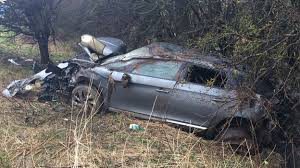

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

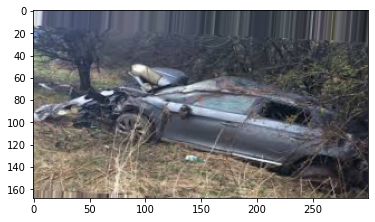

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[2][0]
train_save_path_2 = paths[2][1]
train_save_path_3 = paths[2][2]
test_save_path_1 = paths[3][0]
test_save_path_2 = paths[3][1]
test_save_path_3 = paths[3][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

augumentation_data_2/data_2/train/front
augumentation_data_2/data_2/train/rear
augumentation_data_2/data_2/train/side
augumentation_data_2/data_2/test/front
augumentation_data_2/data_2/test/rear
augumentation_data_2/data_2/test/side


In [ ]:
for i in tqdm(train_front):
    create_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/00-front')

100%|██████████| 419/419 [00:13<00:00, 30.35it/s]


In [ ]:
for i in tqdm(train_rear):
    create_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/01-rear')

100%|██████████| 288/288 [00:09<00:00, 29.36it/s]


In [ ]:
for i in tqdm(train_side):
    create_images(i,train_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/training/02-side')

100%|██████████| 272/272 [00:10<00:00, 25.80it/s]


In [ ]:
for i in tqdm(validate_front):
    create_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/00-front')

100%|██████████| 73/73 [00:02<00:00, 29.48it/s]


In [ ]:
for i in tqdm(validate_rear):
    create_images(i,test_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/01-rear')

100%|██████████| 50/50 [00:01<00:00, 30.99it/s]


In [ ]:
for i in tqdm(validate_side):
    create_images(i,test_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data2a/validation/02-side')

100%|██████████| 48/48 [00:01<00:00, 27.70it/s]


In [ ]:
#Data 3 visualizationb

In [ ]:
sample_file = random.choice(train_severe)
sample_img = image.load_img('drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe'+'/'+sample_file)

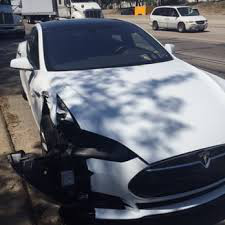

In [ ]:
sample_img

In [ ]:
sample_img_array = image.img_to_array(sample_img)
sample_img_array = sample_img_array.reshape((1,) + sample_img_array.shape)

In [ ]:
samples = []
for arr,val in zip(augmentation.flow(sample_img_array, batch_size=1, save_format='jpg'),range(1)):
    img_save = image.array_to_img(arr[0], scale=False) #scale=False did the trick
    samples.append(img_save)

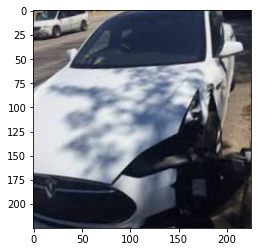

In [ ]:
plt.imshow(samples[0])

In [ ]:
train_save_path_1 = paths[4][0]
train_save_path_2 = paths[4][1]
train_save_path_3 = paths[4][2]
test_save_path_1 = paths[5][0]
test_save_path_2 = paths[5][1]
test_save_path_3 = paths[5][2]
print(train_save_path_1)
print(train_save_path_2)
print(train_save_path_3)
print(test_save_path_1)
print(test_save_path_2)
print(test_save_path_3)

augumentation_data_2/data_3/train/minor
augumentation_data_2/data_3/train/moderate
augumentation_data_2/data_3/train/severe
augumentation_data_2/data_3/test/minor
augumentation_data_2/data_3/test/moderate
augumentation_data_2/data_3/test/severe


In [ ]:
for i in tqdm(train_minor):
    create_images(i,train_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/01-minor')

100%|██████████| 278/278 [00:09<00:00, 30.23it/s]


In [ ]:
for i in tqdm(train_moderate):
    create_images(i,train_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/02-moderate')

100%|██████████| 315/315 [00:10<00:00, 30.39it/s]


In [ ]:
for i in tqdm(train_severe):
    create_images(i,train_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/training/03-severe')

100%|██████████| 386/386 [00:16<00:00, 23.06it/s]


In [ ]:
for i in tqdm(validate_minor):
    create_images(i,test_save_path_1,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/01-minor')

100%|██████████| 48/48 [00:02<00:00, 23.34it/s]


In [ ]:
for i in tqdm(validate_moderate):
    create_images(i,test_save_path_2,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/02-moderate')

100%|██████████| 55/55 [00:01<00:00, 29.61it/s]


In [ ]:
for i in tqdm(validate_severe):
    create_images(i,test_save_path_3,'drive/MyDrive/DS_Project/Dataset/car-damage-dataset/data3a/validation/03-severe')

100%|██████████| 68/68 [00:02<00:00, 30.27it/s]


In [ ]:
#Files counts after augumentation 2

In [ ]:
data_1_files = len(os.listdir('/content/augumentation_data_2/data_1/test/damaged'))+len(os.listdir('/content/augumentation_data_2/data_1/train/damaged'))+len(os.listdir('/content/augumentation_data_2/data_1/train/not_damaged'))+len(os.listdir('/content/augumentation_data_2/data_1/test/not_damaged'))
print('Number of files for all classes in damaged and whole folders are',data_1_files)

Number of files for all classes in damaged and whole folders are 4600


In [ ]:
data_2_files = len(os.listdir('/content/augumentation_data_2/data_2/test/front'))+len(os.listdir('/content/augumentation_data_2/data_2/train/front'))+len(os.listdir('/content/augumentation_data_2/data_2/test/rear'))+len(os.listdir('/content/augumentation_data_2/data_2/train/rear'))+len(os.listdir('/content/augumentation_data_2/data_2/train/side'))+len(os.listdir('/content/augumentation_data_2/data_2/train/side'))
print('Number of files for all classes in front, side and rear folders are ',data_2_files)

Number of files for all classes in front, side and rear folders are  2748


In [ ]:
data_3_files = len(os.listdir('/content/augumentation_data_2/data_3/test/minor'))+len(os.listdir('/content/augumentation_data_2/data_3/train/minor'))+len(os.listdir('/content/augumentation_data_2/data_3/test/moderate'))+len(os.listdir('/content/augumentation_data_2/data_3/train/moderate'))+len(os.listdir('/content/augumentation_data_2/data_3/train/severe'))+len(os.listdir('/content/augumentation_data_2/data_3/train/severe'))
print('Number of files for all classes in minor, moderate and severe folders are ',data_3_files)

Number of files for all classes in minor, moderate and severe folders are  2936


In [ ]:
#%cp -av "/content/augumentation_data_2" "drive/MyDrive/DS_Project/Final_Dataset"

In [ ]:
#Conclusion:
# We have created 3 types of data:
# 1- Original data
# 2- Data after augumentation 1
# 3- Data after augumentation 2

#As we have images with muliple images we use default size(256, 256) for training CNN.